In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customers.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


We keep the clusters obtained from the previous study in the dataset as a feature to obtain information.

In [5]:
df.rename(columns={'Var_1':'Category'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Category         2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [7]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Category            32
dtype: int64

NUMBERS AND PERCENTAGES OF MISSING VALUES

In [8]:
total = df.isnull().sum().sort_values(ascending=False)

percent = df.isnull().sum() /df.isnull().count()*100
percent_2 = (round(percent, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
Work_Experience,269,10.2
Family_Size,113,4.3
Ever_Married,50,1.9
Profession,38,1.4
Category,32,1.2
Graduated,24,0.9
ID,0,0.0
Gender,0,0.0
Age,0,0.0
Spending_Score,0,0.0


In [9]:
df.duplicated().value_counts()

False    2627
Name: count, dtype: int64

PLOTTING CHARTS FOR EDA

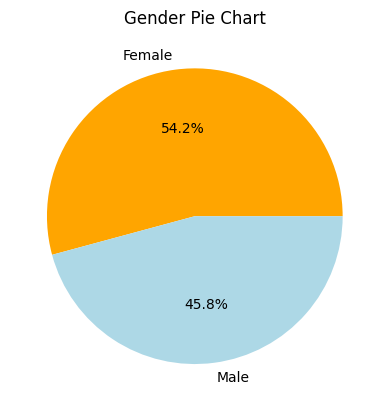

In [10]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(),colors=('Orange','lightblue'), autopct='%1.1f%%')
plt.title('Gender Pie Chart')
plt.show()

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_14684/1641290044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Profession',palette='Set2')


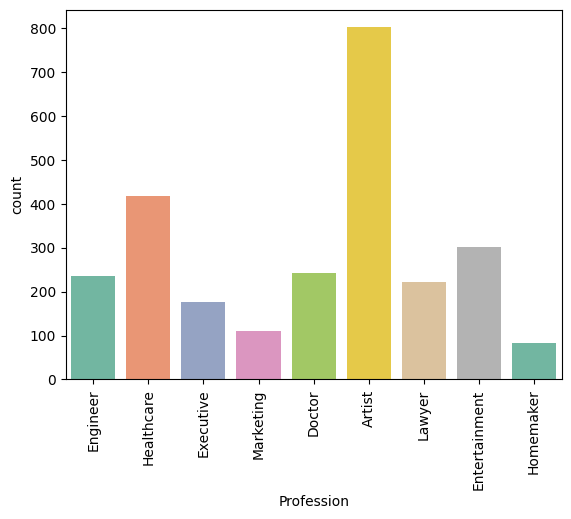

In [11]:
sns.countplot(data=df,x='Profession',palette='Set2')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Distplot of Spending Score')

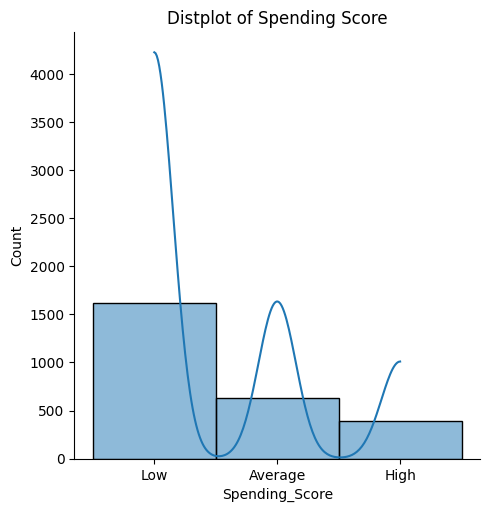

In [12]:
sns.displot(df['Spending_Score'],kde=True)
plt.title('Distplot of Spending Score')

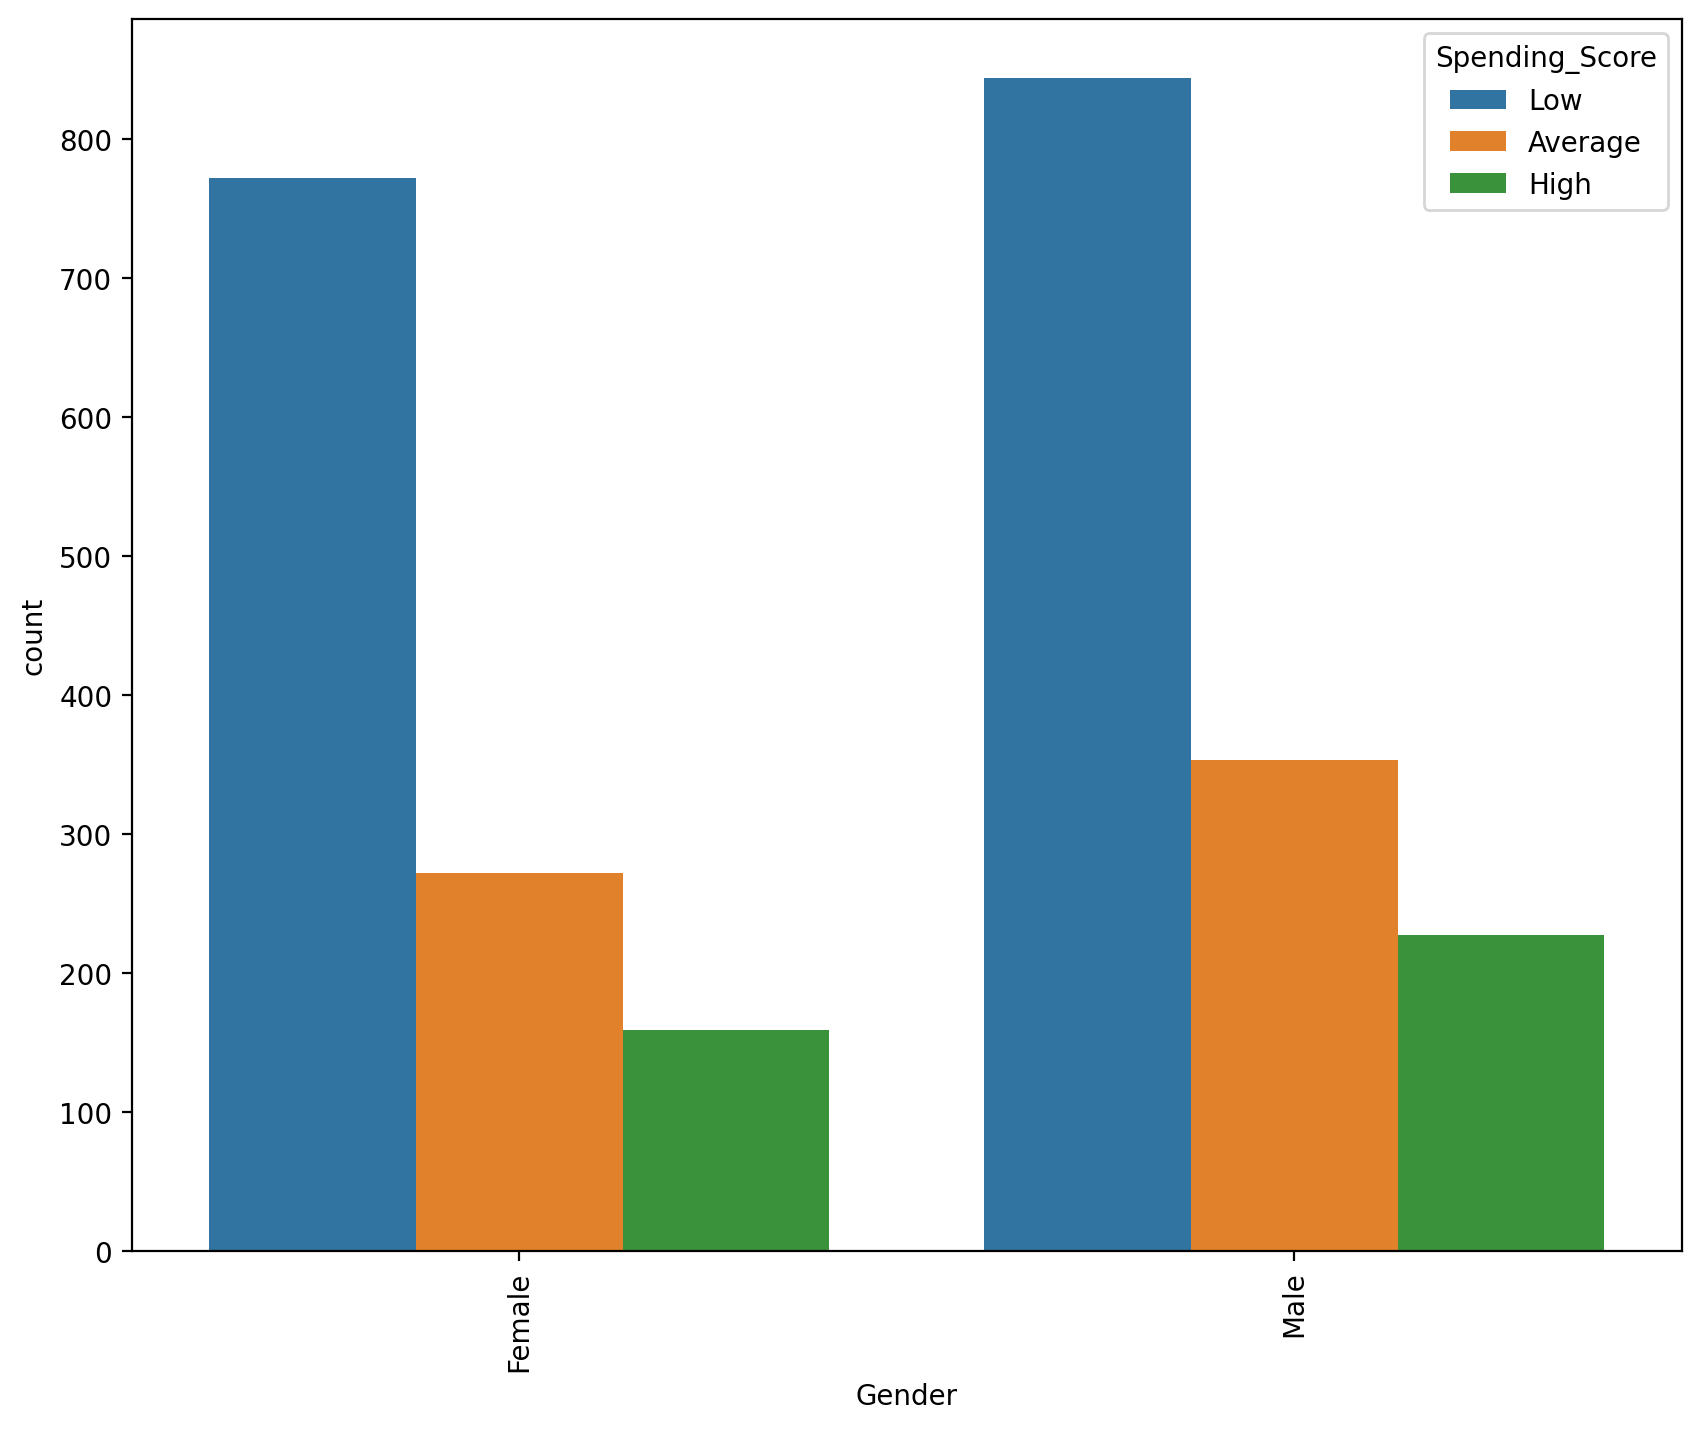

In [13]:
plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='Gender',hue='Spending_Score')
plt.xticks(rotation=90);

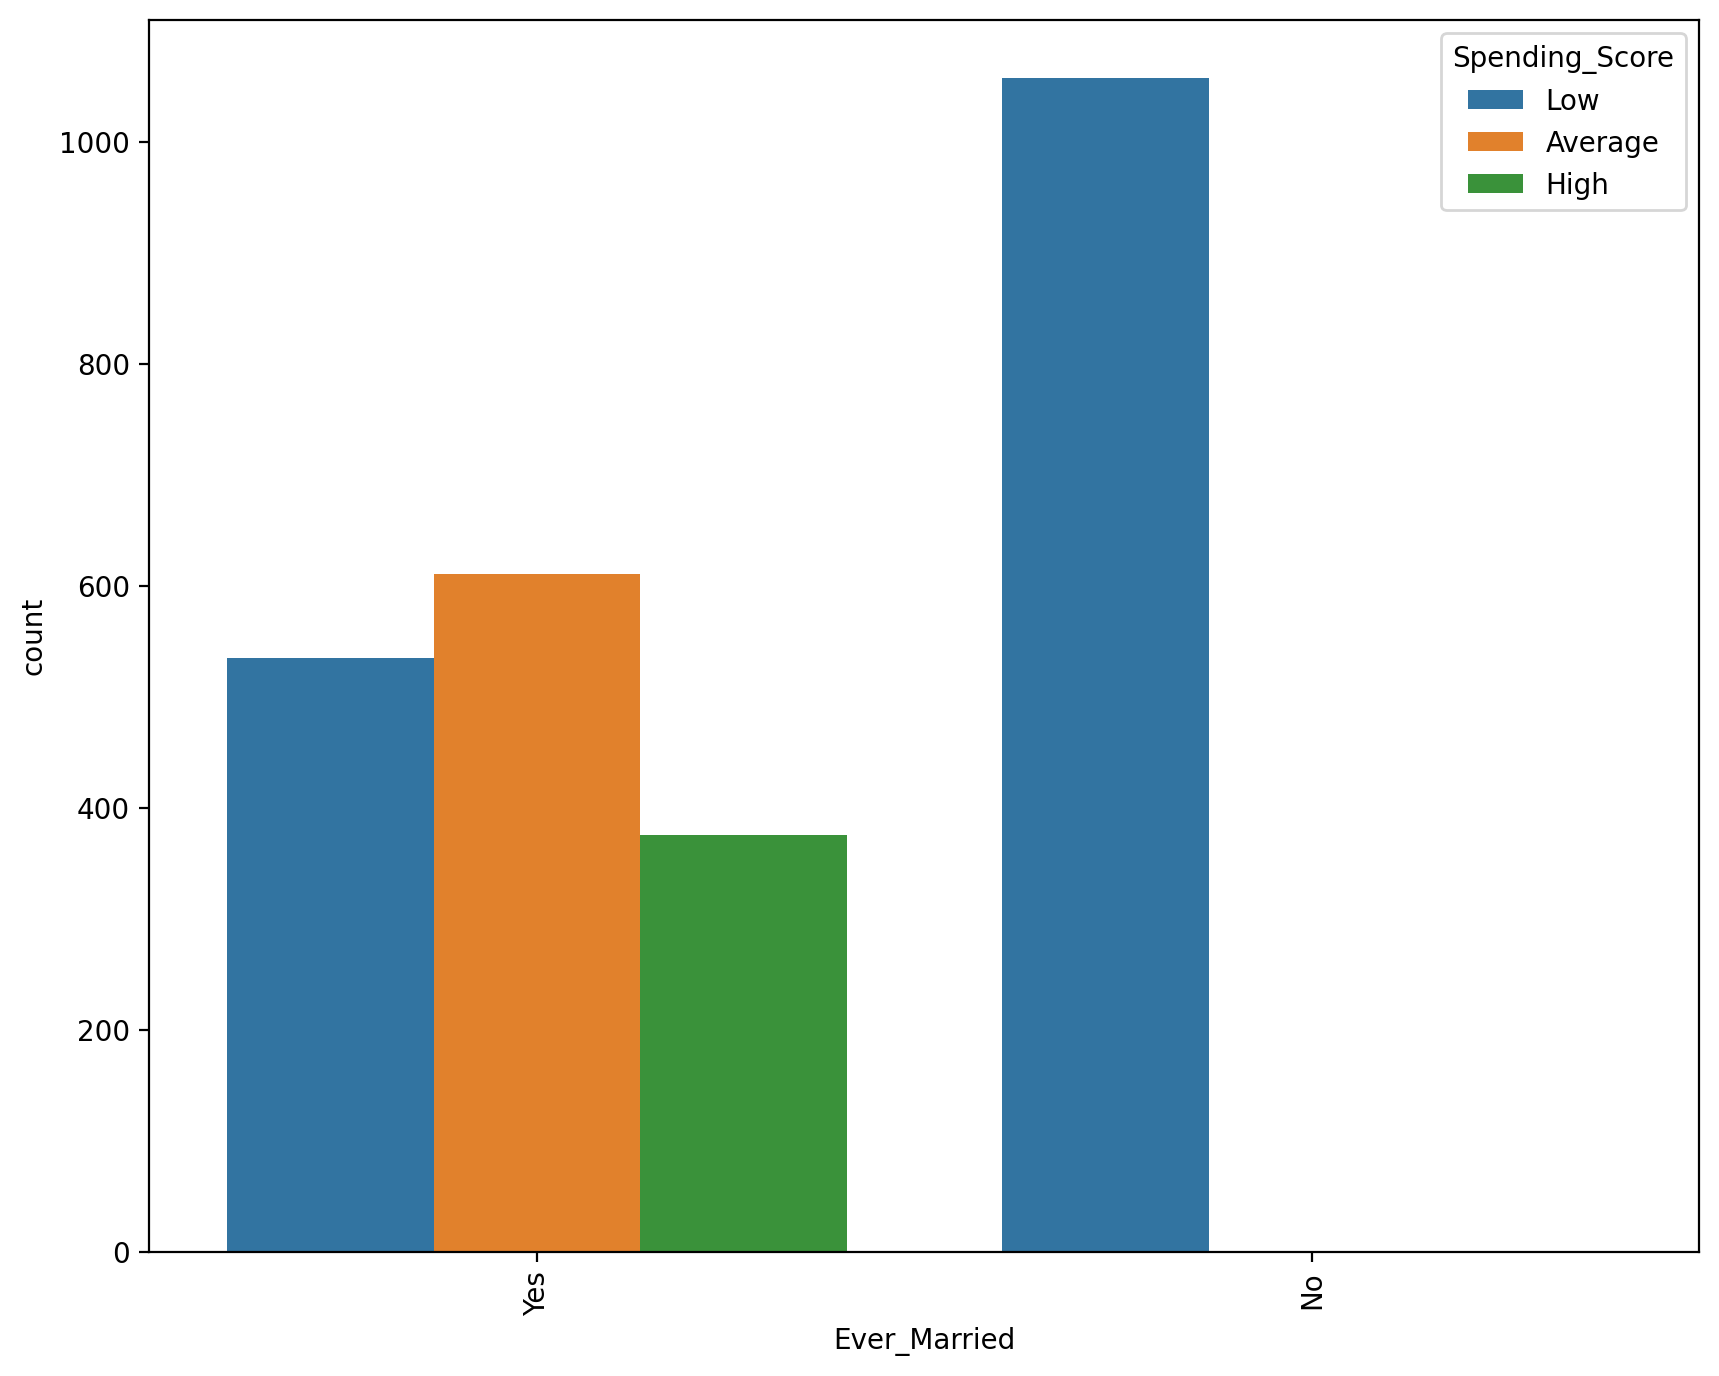

In [14]:
plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='Ever_Married',hue='Spending_Score')
plt.xticks(rotation=90);

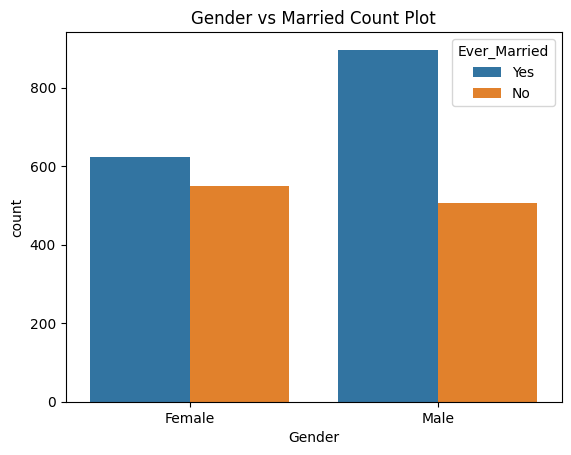

In [15]:
sns.countplot(x='Gender', hue='Ever_Married', data=df)
plt.title('Gender vs Married Count Plot')
plt.show()

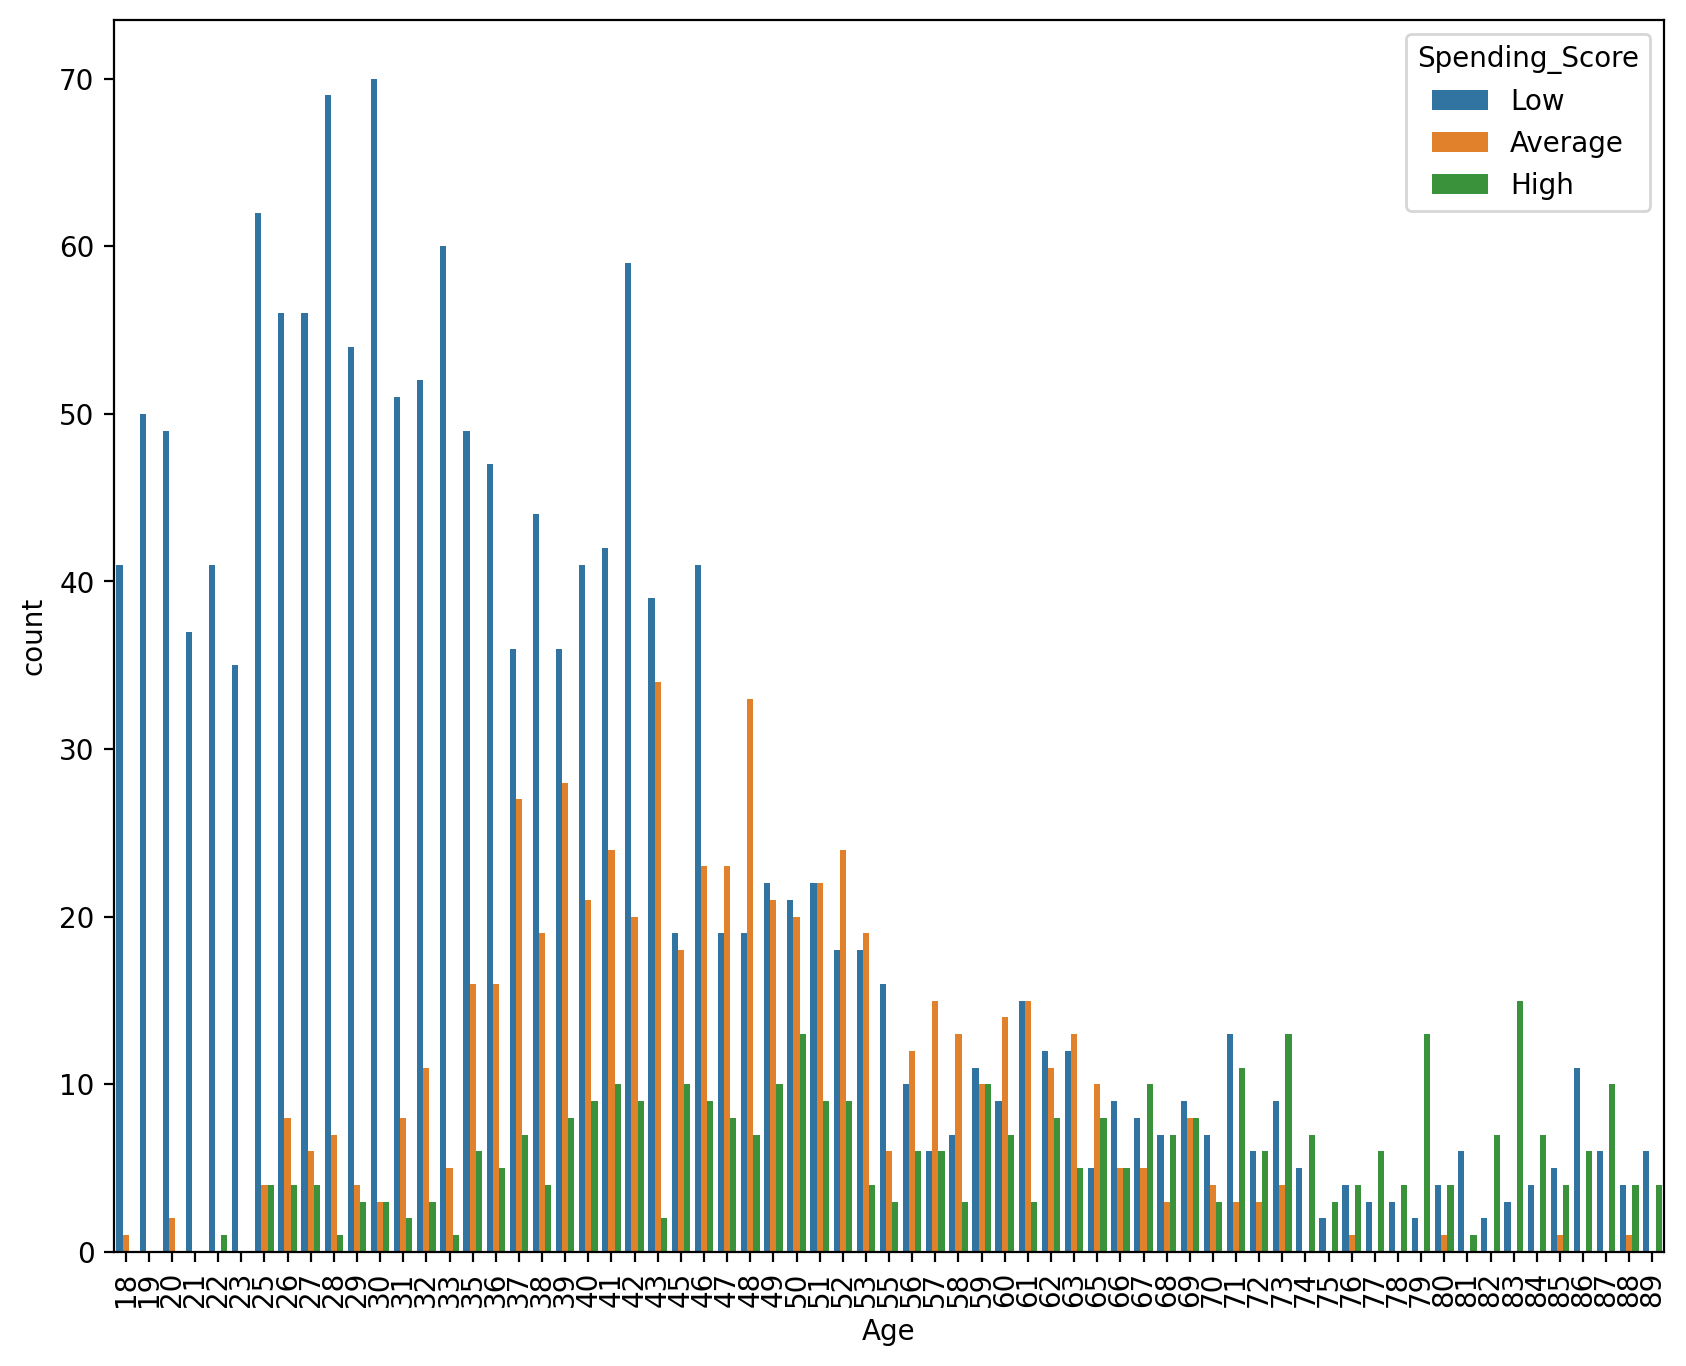

In [16]:
plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='Age',hue='Spending_Score')
plt.xticks(rotation=90);

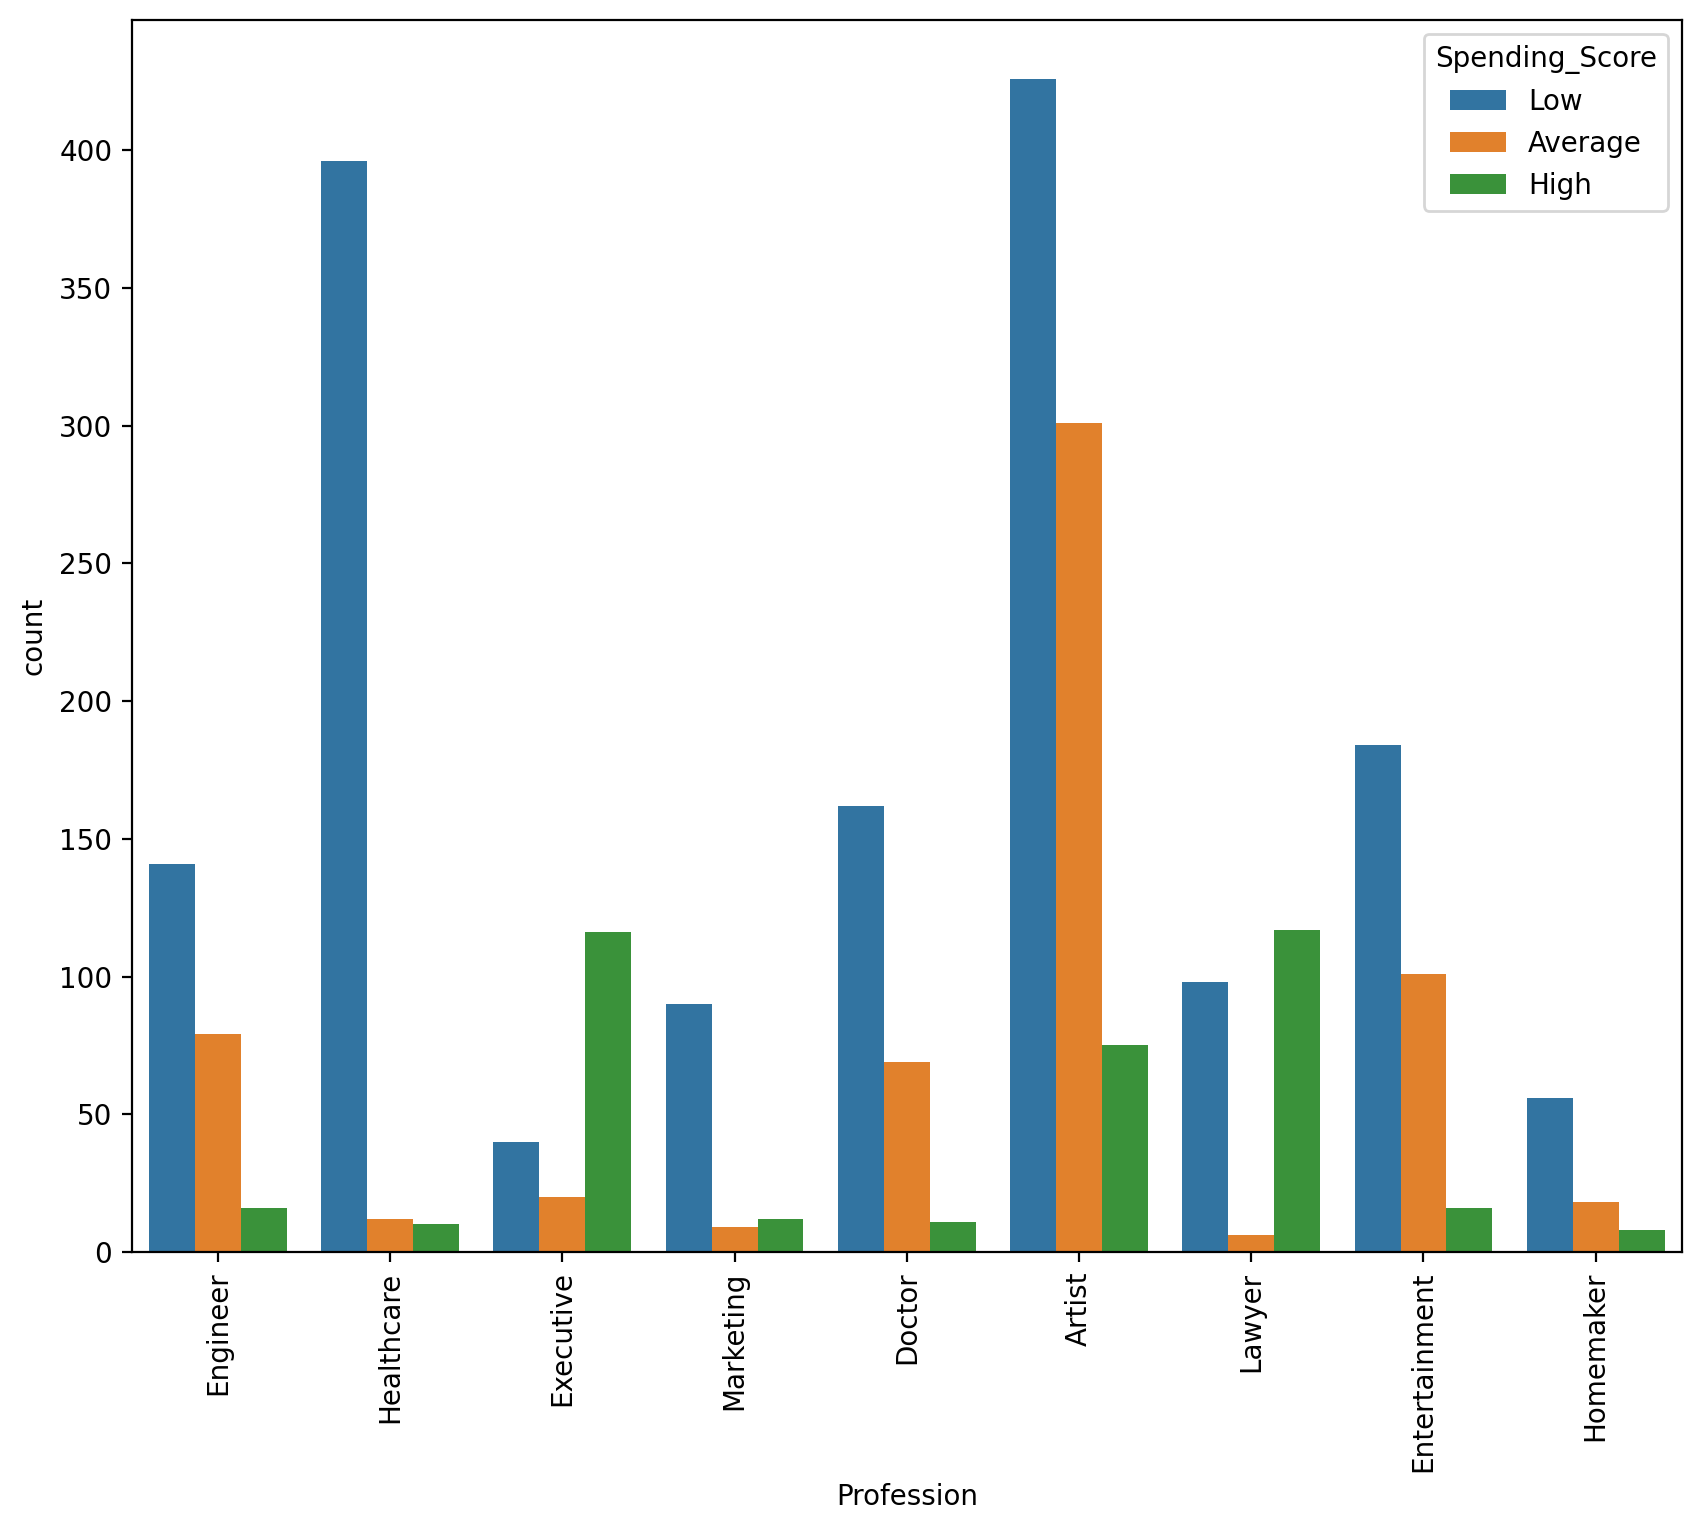

In [17]:
plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='Profession',hue='Spending_Score')
plt.xticks(rotation=90);

In [18]:
corr= df.select_dtypes(exclude=object)
corr.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.022940,-0.025445,0.020830
Age,-0.022940,1.000000,-0.186238,-0.285237
Work_Experience,-0.025445,-0.186238,1.000000,-0.071253
Family_Size,0.020830,-0.285237,-0.071253,1.000000


<Axes: >

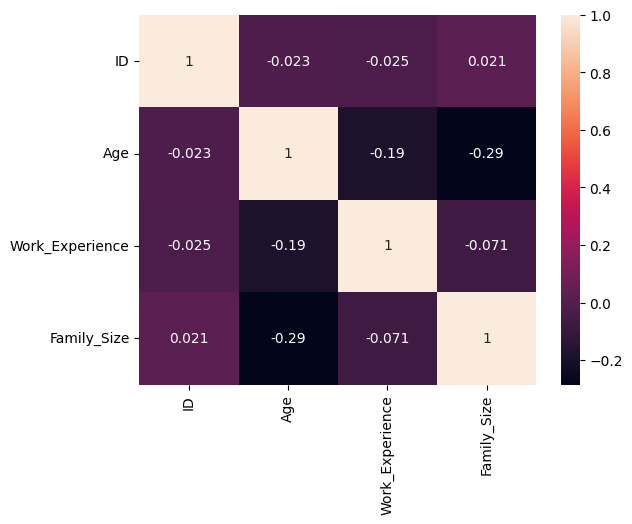

In [19]:
sns.heatmap(corr.corr(),annot=True)

CATEGORIZING AGE COLUMN AND CREATE NEW FEATURE 

In [20]:
df['Age_Category'] = pd.cut(df['Age'], bins=[17, 30, 40, 50, 60, 70, 80, 90],
                              labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90'])

In [21]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category',
       'Age_Category'],
      dtype='object')

/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_14684/4080857791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Age_Category'],y=df['Spending_Score'],palette='mako')


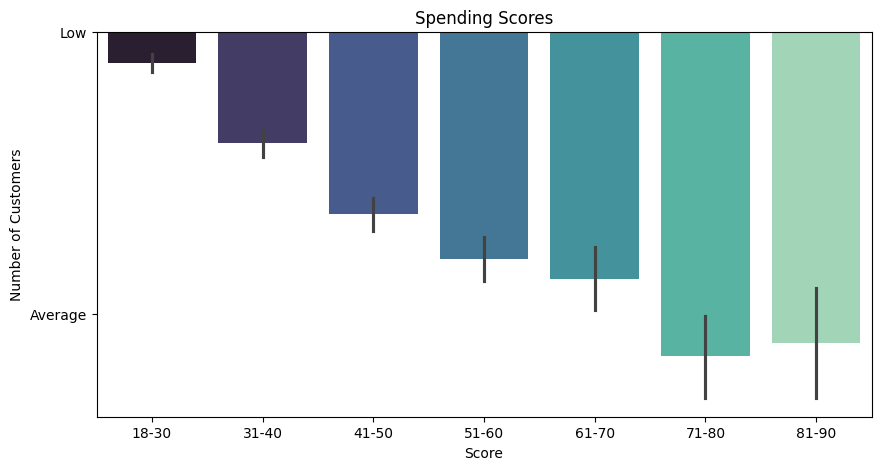

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Age_Category'],y=df['Spending_Score'],palette='mako')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers")
plt.show()

DEALING WITH MISSING VALUES IN WORK EXPERIENCE (SOME ATTRIBUTES HAVE ABNORMAL INFORMATIONS (AGE:20- WROK EXPERIENCE :14))

In [23]:
df.loc[(df['Age']<20)&(df['Work_Experience']>4)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Age_Category
42,459120,Male,No,19,No,Healthcare,5.0,Low,5.0,Cat_2,18-30
48,459140,Female,No,19,No,Healthcare,7.0,Low,6.0,Cat_6,18-30
465,460485,Female,No,19,No,Marketing,8.0,Low,5.0,Cat_3,18-30
466,460489,Male,No,19,No,Healthcare,9.0,Low,6.0,Cat_3,18-30
637,461082,Male,No,19,No,Healthcare,8.0,Low,4.0,Cat_1,18-30
649,461128,Male,No,19,No,Healthcare,7.0,Low,3.0,Cat_6,18-30
878,461931,Female,No,18,No,Healthcare,6.0,Low,5.0,NaN,18-30
968,462220,Female,No,19,No,Healthcare,6.0,Low,3.0,Cat_4,18-30
1723,464857,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_4,18-30
1837,465242,Male,No,19,No,Healthcare,5.0,Low,4.0,Cat_3,18-30


FILLING MISSING VALUES BY STATISTICS

In [24]:
df[df['Age']==19]['Work_Experience'].mean()

2.3255813953488373

In [25]:
df[df['Age']==18]['Work_Experience'].mean()

1.631578947368421

In [26]:
df[(df['Age'] < 20) & (df['Work_Experience'] > df['Age'] - 16)].value_counts().sum()

17

CREATING REASONABLE WORK EXPERIENCE 

In [27]:
filter_condition = (df['Age'] < 20) & (df['Work_Experience'] >= df['Age'] - 16)
df.loc[filter_condition, 'Work_Experience'] = df.loc[filter_condition, 'Age'] - 16

In [28]:
df[(df['Age'] < 20) & (df['Work_Experience'] > df['Age'] - 16)].value_counts().sum()

0

In [29]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Category            32
Age_Category         0
dtype: int64

In [30]:
df.loc[df['Work_Experience'].isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Age_Category
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,18-30
20,459056,Male,Yes,63,No,Executive,NaN,High,3.0,Cat_6,61-70
21,459057,Male,Yes,69,No,Lawyer,NaN,High,NaN,Cat_6,61-70
23,459059,Male,Yes,79,No,Executive,NaN,High,2.0,Cat_6,71-80
26,459065,Male,Yes,52,Yes,Engineer,NaN,Low,2.0,Cat_6,51-60
...,...,...,...,...,...,...,...,...,...,...,...
2547,467706,Female,Yes,35,Yes,Artist,NaN,Average,4.0,Cat_6,31-40
2572,467798,Female,No,23,No,NaN,NaN,Low,2.0,Cat_6,18-30
2588,467861,Female,No,29,No,Artist,NaN,Low,4.0,Cat_4,18-30
2593,467879,Female,Yes,51,Yes,Artist,NaN,High,4.0,Cat_6,51-60


In [31]:
df['Work_Experience'].fillna(df['Work_Experience'].median(), inplace=True)
df['Family_Size'].fillna(df['Family_Size'].median(), inplace=True)

In [32]:
df.isnull().sum()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Category           32
Age_Category        0
dtype: int64

In [33]:
df.loc[df['Graduated'].isnull()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Age_Category
179,459518,Male,Yes,63,NaN,NaN,1.0,Average,4.0,Cat_6,61-70
376,460211,Male,Yes,28,NaN,Artist,6.0,Low,1.0,Cat_6,18-30
514,460640,Male,Yes,86,NaN,Lawyer,1.0,Low,1.0,Cat_3,81-90
521,460660,Male,No,39,NaN,Entertainment,6.0,Low,1.0,Cat_6,31-40
602,460975,Male,Yes,79,NaN,Lawyer,0.0,High,2.0,Cat_6,71-80
948,462177,Male,No,35,NaN,Artist,6.0,Low,5.0,Cat_2,31-40
1281,463266,Female,Yes,68,NaN,Artist,1.0,Average,2.0,Cat_6,61-70
1304,463351,Female,No,21,NaN,Healthcare,3.0,Low,4.0,Cat_5,18-30
1441,463819,Male,Yes,28,NaN,Artist,8.0,Low,2.0,Cat_6,18-30
1559,464257,Male,Yes,40,NaN,Entertainment,0.0,High,2.0,Cat_6,31-40


DEALING MISSING VALUES OF PROFESSION. FOR EXAMPLE (PROFESSION = LAW, GRADUATED : NO)  

In [34]:
df.loc[df['Graduated'].isnull() & df['Profession'].notnull(),'Graduated'] = 'Yes'

In [35]:
df.isnull().sum()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated           1
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Category           32
Age_Category        0
dtype: int64

COUNTING VALUES BETWEEN FEATURES

In [36]:
def groupby_count(df, groupby_cols, count_col, filter_cols=None):
    if filter_cols:
        df = df[filter_cols + groupby_cols + [count_col]]
    else:
        df = df[groupby_cols + [count_col]]
    return df.groupby(by=groupby_cols).count()

In [37]:
print(groupby_count(df, ['Spending_Score','Ever_Married'], 'ID') )

                               ID
Spending_Score Ever_Married      
Average        Yes            610
High           Yes            375
Low            No            1057
               Yes            535


In [38]:
print(groupby_count(df, ['Profession','Ever_Married'], 'ID') )

                             ID
Profession    Ever_Married     
Artist        No            251
              Yes           542
Doctor        No            113
              Yes           124
Engineer      No             85
              Yes           143
Entertainment No            109
              Yes           187
Executive     No              9
              Yes           163
Healthcare    No            362
              Yes            47
Homemaker     No             35
              Yes            44
Lawyer        No             14
              Yes           204
Marketing     No             66
              Yes            43


In [39]:
print(groupby_count(df, ['Age_Category','Ever_Married'], 'ID') )

                            ID
Age_Category Ever_Married     
18-30        No            557
             Yes           103
31-40        No            304
             Yes           299
41-50        No            141
             Yes           425
51-60        No             34
             Yes           264
61-70        No             11
             Yes           203
71-80        No              7
             Yes           125
81-90        No              3
             Yes           101


/var/folders/g8/09383sds4_1bldj65ms2wh9m0000gn/T/ipykernel_14684/921931155.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by=groupby_cols).count()


FILLING MARITAL STATUS ACCORDING TO AGE CATEGORIES

In [40]:
df.loc[(df['Ever_Married'].isnull()) & (df['Age'] > 40), 'Ever_Married'] = 'Yes'
df.loc[(df['Ever_Married'].isnull()) & (df['Age'].between(18, 30)), 'Ever_Married'] = 'No'

In [41]:
df['Ever_Married'].isnull().sum()

9

In [42]:
null_indexes = df[df['Ever_Married'].isnull()].index

options = ["Yes"] * 5 + ["No"] * 4
np.random.shuffle(options)

for index, option in zip(null_indexes, options):
    df.at[index, 'Ever_Married'] = option

In [43]:
df.isnull().sum()

ID                  0
Gender              0
Ever_Married        0
Age                 0
Graduated           1
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Category           32
Age_Category        0
dtype: int64

In [44]:
df['Category'].fillna('Un_cat',inplace=True)
df['Profession'].fillna('Other',inplace=True)

In [45]:
df['Category'].value_counts()

Category
Cat_6     1672
Cat_4      386
Cat_3      267
Cat_2      141
Cat_7       66
Cat_1       34
Un_cat      32
Cat_5       29
Name: count, dtype: int64

In [46]:
df=df.dropna()

MAPPING FEATURES

In [47]:
mapping = {'Yes': 1, 'No': 0}
df['Ever_Married'] = df['Ever_Married'].map(mapping)
df['Ever_Married'] = df['Ever_Married'].astype(int)

In [48]:
mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(mapping)
df['Gender'] = df['Gender'].astype(int)

In [49]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Age_Category       0
dtype: int64

In [50]:
mapping = {'Yes': 1, 'No': 0}
df['Graduated'] = df['Graduated'].map(mapping)
df['Graduated'] = df['Graduated'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2626 non-null   int64   
 1   Gender           2626 non-null   int64   
 2   Ever_Married     2626 non-null   int64   
 3   Age              2626 non-null   int64   
 4   Graduated        2626 non-null   int64   
 5   Profession       2626 non-null   object  
 6   Work_Experience  2626 non-null   float64 
 7   Spending_Score   2626 non-null   object  
 8   Family_Size      2626 non-null   float64 
 9   Category         2626 non-null   object  
 10  Age_Category     2626 non-null   category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 228.6+ KB


In [52]:
df['Profession'].value_counts()

Profession
Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Other             37
Name: count, dtype: int64

ENCODING

In [53]:
df['Category'].value_counts()

Category
Cat_6     1671
Cat_4      386
Cat_3      267
Cat_2      141
Cat_7       66
Cat_1       34
Un_cat      32
Cat_5       29
Name: count, dtype: int64

SAVING DATASET BEFORE ENCODING. WE WILL USE IT TO PLOT CLUSTER'S FEATURES

In [54]:
df.to_csv('cleaned.csv')

In [55]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Age_Category
0,458989,0,1,36,1,Engineer,0.0,Low,1.0,Cat_6,31-40
1,458994,1,1,37,1,Healthcare,8.0,Average,4.0,Cat_6,31-40
2,458996,0,1,69,0,Other,0.0,Low,1.0,Cat_6,61-70
3,459000,1,1,59,0,Executive,11.0,High,2.0,Cat_6,51-60
4,459001,0,0,19,0,Marketing,1.0,Low,4.0,Cat_6,18-30
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,Healthcare,9.0,Low,4.0,Cat_6,18-30
2623,467958,0,0,35,1,Doctor,1.0,Low,1.0,Cat_6,31-40
2624,467960,0,0,53,1,Entertainment,1.0,Low,2.0,Cat_6,51-60
2625,467961,1,1,47,1,Executive,1.0,High,5.0,Cat_4,41-50


ORDINAL ENCODING TO KEEP RELATIONS BETWEEN VALUES 

In [56]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df['Spending_Score'] = encoder.fit_transform(df[['Spending_Score']])


In [57]:
def one_hot_encoding(data, columns):

    for column in columns:
        encoded_column = pd.get_dummies(data[column], prefix=column, drop_first=False)
        data = pd.concat([data, encoded_column], axis=1)
    
    return data

In [58]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Age_Category
0,458989,0,1,36,1,Engineer,0.0,2.0,1.0,Cat_6,31-40
1,458994,1,1,37,1,Healthcare,8.0,0.0,4.0,Cat_6,31-40
2,458996,0,1,69,0,Other,0.0,2.0,1.0,Cat_6,61-70
3,459000,1,1,59,0,Executive,11.0,1.0,2.0,Cat_6,51-60
4,459001,0,0,19,0,Marketing,1.0,2.0,4.0,Cat_6,18-30
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,Healthcare,9.0,2.0,4.0,Cat_6,18-30
2623,467958,0,0,35,1,Doctor,1.0,2.0,1.0,Cat_6,31-40
2624,467960,0,0,53,1,Entertainment,1.0,2.0,2.0,Cat_6,51-60
2625,467961,1,1,47,1,Executive,1.0,1.0,5.0,Cat_4,41-50


In [59]:
df = one_hot_encoding(df,['Profession'])
df =one_hot_encoding(df,['Age_Category'])
df= one_hot_encoding(df,['Category'])

In [60]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Age_Category,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Other,Age_Category_18-30,Age_Category_31-40,Age_Category_41-50,Age_Category_51-60,Age_Category_61-70,Age_Category_71-80,Age_Category_81-90,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Category_Un_cat
0,458989,0,1,36,1,Engineer,0.0,2.0,1.0,Cat_6,31-40,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,458994,1,1,37,1,Healthcare,8.0,0.0,4.0,Cat_6,31-40,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
2,458996,0,1,69,0,Other,0.0,2.0,1.0,Cat_6,61-70,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,459000,1,1,59,0,Executive,11.0,1.0,2.0,Cat_6,51-60,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,459001,0,0,19,0,Marketing,1.0,2.0,4.0,Cat_6,18-30,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


DROPPING COLUMNS WHICH ARE ENCODED

In [61]:
df = df.drop(columns=['Category','Age_Category','ID','Profession'],axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626 entries, 0 to 2626
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2626 non-null   int64  
 1   Ever_Married              2626 non-null   int64  
 2   Age                       2626 non-null   int64  
 3   Graduated                 2626 non-null   int64  
 4   Work_Experience           2626 non-null   float64
 5   Spending_Score            2626 non-null   float64
 6   Family_Size               2626 non-null   float64
 7   Profession_Artist         2626 non-null   bool   
 8   Profession_Doctor         2626 non-null   bool   
 9   Profession_Engineer       2626 non-null   bool   
 10  Profession_Entertainment  2626 non-null   bool   
 11  Profession_Executive      2626 non-null   bool   
 12  Profession_Healthcare     2626 non-null   bool   
 13  Profession_Homemaker      2626 non-null   bool   
 14  Profession_La

In [63]:
df.corr()['Spending_Score'].sort_values(ascending=False)

Spending_Score              1.000000
Age_Category_18-30          0.341213
Profession_Healthcare       0.279243
Profession_Marketing        0.087735
Work_Experience             0.062663
Age_Category_31-40          0.036134
Category_Cat_3              0.034592
Category_Cat_7              0.029062
Category_Cat_5              0.021812
Profession_Homemaker        0.018246
Profession_Lawyer           0.013858
Age_Category_81-90          0.010466
Category_Cat_2              0.009493
Profession_Doctor           0.002471
Profession_Other            0.000088
Category_Un_cat            -0.004482
Category_Cat_1             -0.007370
Category_Cat_4             -0.018905
Category_Cat_6             -0.023706
Age_Category_71-80         -0.023859
Gender                     -0.041311
Profession_Engineer        -0.042896
Profession_Entertainment   -0.043552
Profession_Executive       -0.083996
Family_Size                -0.107724
Age_Category_61-70         -0.115343
Graduated                  -0.138489
A

Scaling DataFrame

In [64]:
df.to_csv('tidydata.csv',index=False)